# Net Promoter Score Analysis on Make School Summer Academy Data
### Questions to ask: 
### 1. How can we translate the given data to understand which students are promoters, passives and detractors? 
### 2. Does the student experience get better the longer that they are enrolled at Summer Academy? 
### 3. How does the amount of data collected week by week change the results? 
### 4. Does student satisfaction vary by location?

### Data Cleaning Questions

- How do we consolidate `Week` and `Location` data from the 2016 filenames to the final 2016 DataFrame?

## Steps for Cleaning All Data:
---
- [x] Step 1: Clean the 2016 Data (Weeks 1-7) into One DataFrame.
- [x] Step 2: Clean the 2016 Data (Weeks 8) into One DataFrame.
- [x] Step 2.5: Aggregate both 2016 Datasets (Weeks 1-7 and Week 8) into One Bigger DF (Weeks 1-8).
- [x] Step 3: Clean the 2017 Data into One DataFrame.
- [x] Step 3.5: Aggregate the 2016 DataFrame (Weeks 1-8) and the 2017 DF into One Biggest DF (2016-17). 


### Observation that 4/5 may not be exactly equivalent to 8/10 as it is to 9/10...

- [`STRETCH`] Try both scenarios on any related questions!

## What is Cleaning?

- Some data might be irrelevant, redundant, null, nonsensical
- Cleaning involves the steps to reduce the noise in a dataset
- CLEANING: Converting a ton of noise, extracting _signal_, and ending up with a **single source of truth**
- Signal is data that is valuable towards answering a question; extracting signal is our end goal in all types of data science


# Kash Cleaning Tips


### Understand what a column (feature) is truly communicating 
- Examples: [1-5] scale vs. [1-10] vs. "A little too slow" text scale, 

### NULL Values (NaNs)
- 

In [547]:
import glob
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [548]:
# df16 = [pd.read_csv(f) for f in glob.glob('./SA Feedback Surveys_FINAL/2016/*.csv')]

# all_csvs = glob.glob(os.path.join('./SA Feedback Surveys_FINAL/2016/', "*.csv"))
# read_all_csvs = (pd.read_csv(f) for f in all_csvs)
# df = pd.concat(read_all_csvs, ignore_index = True, sort = True)
# df.head()

# the_bad_thing = np.nan
# type(the_bad_thing)

# To-Do List
- [ ] Check all columns to see if they have valid responses
- [ ] #REF! rows invalid
- [ ] Convert all string scors to int values
- [ ] Track, location vs popularity
- [ ] Understand from which region of the country students are most satisfied or dissatisfied 


## Data Cleaning/Manipulation on the 2017 Data
### Importing the 2017 data 

In [549]:
path_2017 = "./SA Feedback Surveys_FINAL/2017/Student Feedback Surveys-Superview.csv"
data_2017 = pd.read_csv(path_2017)

In [550]:
# A few NaN values, but nothing terrible 
data_2017

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right
5,23,Redwood City,Apps,Week 1,5,Just right
6,28,Los Angeles,Apps,Week 7,5,Just right
7,65,San Francisco,Apps,Week 1,5,A little too slow
8,101,Santa Clara,Apps,Week 1,5,A little too slow
9,124,Santa Clara,Apps,Week 1,5,Just right


### - Replacing the NaNs with a 'harmless' value such as 'Location' for the location column or 'Week' for the week column
### - Adding a 'Year' column to keep track of which year each value was recorded when we aggregate the seperate years later on
### - Removing '#ERROR!' values; these columns have no useful data
### - Mapping Schedule Pacing values to integers for ease of comparison with the other dataframes later on

### In order to ensure our empty data in our Schedule Pacing column does not contort our findings, we'll replace the NaNs with a "harmless" value with a datatype that matches the rest of our column.

In this case, since we want to convert our strings to ints, we'll turn our NaNs into ints outside of our expected useful range. 

Since we want to end up with a range of [1, 5], we'll give our NaN values a value of 0. 

In [551]:
data_2017["Schedule Pacing"].unique()

array(['Just right', 'A little too fast', 'Way too slow',
       'A little too slow', 'Way too fast', nan], dtype=object)

## Clever Data Cleaning for _Scheduling Pacing_

In [552]:
def clean_schedule_pacing_2017(data_2017):
    """ Function designed to clean NaNs and convert strings to ints across Scheduling Pacing column of DF 2017. """
    pacing_map = {
        "Way too slow": 1,
        "A little too slow": 2,
        "Just right": 3,
        "A little too fast": 4,
        "Way too fast": 5
    }
    data_2017["Schedule Pacing"] = data_2017["Schedule Pacing"].replace(pacing_map).fillna(0).astype(int)
    return data_2017

## NOTE: Only call this function when cleaning newly initialized 2017 data.

In [553]:
data_2017 = clean_schedule_pacing_2017(data_2017)

In [554]:
data_2017["Schedule Pacing"].unique()

array([3, 4, 1, 2, 5, 0])

In [555]:
# unique_vals = set()

# for value in data_2017["Rating (Num)"]:
#     unique_vals.update([type(value)])


In [556]:
def replace_errors_in_ratings_2017(data_2017):
    arg_all_but_errors = (data_2017["Rating (Num)"] != "#ERROR!")
    data_2017 = data_2017[arg_all_but_errors]
    data_2017["Rating (Num)"] = data_2017["Rating (Num)"].astype(int)
    return data_2017

In [557]:
data_2017 = replace_errors_in_ratings_2017(data_2017)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [558]:
data_2017["Rating (Num)"].unique()

array([ 3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2])

In [559]:
data_2017["Week"].unique()

array(['Week 1', 'Week 2', 'Week 7', 'Week 3', 'Week 4', 'Week 5',
       'Week 6', 'Week 8'], dtype=object)

In [560]:
data_2017["Track"] = data_2017["Track"].fillna('Track')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [561]:
data_2017["Track"].unique()

array(['Apps, Explorer', 'Apps', 'Games', 'Track', 'VR',
       'Games, Explorer'], dtype=object)

In [562]:
# df[(df['Sex'] == 'female')].Age.hist(bins=16)
data_2017[(data_2017["Track"] == 'Apps, Explorer')].count()

ID                 224
Location           224
Track              224
Week               224
Rating (Num)       224
Schedule Pacing    224
dtype: int64

In [563]:
data_2017.head()

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,3
1,36,Los Angeles,Apps,Week 1,4,4
2,117,San Francisco,Games,Week 1,4,1
3,253,NaN,Track,Week 2,4,4
4,350,New York City,"Apps, Explorer",Week 1,4,3


In [564]:
data_2017["Location"].unique()

array(['San Francisco', 'Los Angeles', nan, 'New York City',
       'Redwood City', 'Santa Clara', 'Oakland', 'Washington DC',
       'Chicago', 'Atlanta', 'Hong Kong', 'Beijing', 'Tokyo'],
      dtype=object)

In [565]:
data_2017["Location"] = data_2017["Location"].fillna('Location')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [566]:
data_2017["ID"].unique()

array([ 134,   36,  117, ..., 1497, 1498, 1499])

In [567]:
# pd.isnull(df.Age).sum()
pd.isnull(data_2017.ID).sum()

0

In [568]:
data_2017["Year"] = "2017"

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [569]:
# Much better! 
data_2017

,ID,Location,Track,Week,Rating (Num),Schedule Pacing,Year
0,134,San Francisco,"Apps, Explorer",Week 1,3,3,2017
1,36,Los Angeles,Apps,Week 1,4,4,2017
2,117,San Francisco,Games,Week 1,4,1,2017
3,253,Location,Track,Week 2,4,4,2017
4,350,New York City,"Apps, Explorer",Week 1,4,3,2017
5,23,Redwood City,Apps,Week 1,5,3,2017
6,28,Los Angeles,Apps,Week 7,5,3,2017
7,65,San Francisco,Apps,Week 1,5,2,2017
8,101,Santa Clara,Apps,Week 1,5,2,2017
9,124,Santa Clara,Apps,Week 1,5,3,2017


## Data Cleaning/Manipulation on the 2016 Data (Not yet including Week 8)
### Week 8 had different columns and values
### Wanted to make it easier to work with the initial data and then add the different values later on
### Importing the needed files

In [570]:
csv_2016 = glob.glob(os.path.join('./SA Feedback Surveys_FINAL/2016/', "*.csv"))
read_all_csvs = (pd.read_csv(f) for f in csv_2016)
data_2016 = pd.concat(read_all_csvs, ignore_index = True, sort = True)


In [571]:
# path_2016 = "./SA Feedback Surveys_FINAL/2016/*.csv"
# data_2016 = pd.read_csv(path_2016)

In [572]:
# A lot more dirty data found here 
data_2016

,How well are the tutorials paced?,How well is the schedule paced?,How would you rate your overall satisfaction with the Summer Academy this week?,Timestamp,Unnamed: 0,What track are you in?
0,NaN,3,3,8/5/2016 1:39:41,NaN,NaN
1,NaN,3,4,8/5/2016 1:40:47,NaN,NaN
2,NaN,3,4,8/5/2016 1:40:50,NaN,NaN
3,NaN,4,4,8/5/2016 1:42:44,NaN,NaN
4,NaN,4,5,8/5/2016 1:45:13,NaN,NaN
5,NaN,3,4,8/5/2016 1:45:39,NaN,NaN
6,NaN,3,4,8/5/2016 1:49:21,NaN,NaN
7,NaN,3,5,8/8/2016 1:30:34,NaN,NaN
8,NaN,3,5,8/8/2016 1:33:45,NaN,NaN
9,NaN,3,5,8/8/2016 1:49:29,NaN,NaN


In [573]:
data_2016["How would you rate your overall satisfaction with the Summer Academy this week?"].value_counts()

4        406
5        342
3        118
4         18
2         16
5         13
1          8
3          5
#REF!      1
Name: How would you rate your overall satisfaction with the Summer Academy this week?, dtype: int64

### - Removing '#REF!' values; they also contain no useful data
### - Adding a 'Year' column once again to keep track of which year each data point was collected
### - Dropping 'Unnamed: 0' which did not contain any intelligible data
### - Filling NaN values; this time numeric values are filled with integer 0 since it was not used on the rating scale

In [574]:
def replace_errors_in_ratings_2016(data_2016):
    arg_all_but_errors = (data_2016["How well is the schedule paced?"] != "#REF!")
    data_2016 = data_2016[arg_all_but_errors]
    return data_2016

In [575]:
data_2016 = replace_errors_in_ratings_2016(data_2016)

In [576]:
# data_2016
data_2016["Year"] = "2016"

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [577]:
data_2016.head()

,How well are the tutorials paced?,How well is the schedule paced?,How would you rate your overall satisfaction with the Summer Academy this week?,Timestamp,Unnamed: 0,What track are you in?,Year
0,NaN,3,3,8/5/2016 1:39:41,NaN,NaN,2016
1,NaN,3,4,8/5/2016 1:40:47,NaN,NaN,2016
2,NaN,3,4,8/5/2016 1:40:50,NaN,NaN,2016
3,NaN,4,4,8/5/2016 1:42:44,NaN,NaN,2016
4,NaN,4,5,8/5/2016 1:45:13,NaN,NaN,2016


In [578]:
data_2017.head()

,ID,Location,Track,Week,Rating (Num),Schedule Pacing,Year
0,134,San Francisco,"Apps, Explorer",Week 1,3,3,2017
1,36,Los Angeles,Apps,Week 1,4,4,2017
2,117,San Francisco,Games,Week 1,4,1,2017
3,253,Location,Track,Week 2,4,4,2017
4,350,New York City,"Apps, Explorer",Week 1,4,3,2017


In [579]:
# Remove columns with no real information
data_2016 = data_2016.drop(["Unnamed: 0"], axis=1)

In [580]:
data_2016.head()

,How well are the tutorials paced?,How well is the schedule paced?,How would you rate your overall satisfaction with the Summer Academy this week?,Timestamp,What track are you in?,Year
0,NaN,3,3,8/5/2016 1:39:41,NaN,2016
1,NaN,3,4,8/5/2016 1:40:47,NaN,2016
2,NaN,3,4,8/5/2016 1:40:50,NaN,2016
3,NaN,4,4,8/5/2016 1:42:44,NaN,2016
4,NaN,4,5,8/5/2016 1:45:13,NaN,2016


In [581]:
data_2016["What track are you in?"].unique()

array([nan, 'Intro', 'Games', 'Apps', 'VR'], dtype=object)

In [582]:
data_2016["How well are the tutorials paced?"] = data_2016["How well are the tutorials paced?"].fillna(0).astype(int)

In [583]:
data_2016["How well is the schedule paced?"] = data_2016["How well is the schedule paced?"].fillna(0).astype(int)

In [584]:
data_2016["How would you rate your overall satisfaction with the Summer Academy this week?"] = data_2016["How would you rate your overall satisfaction with the Summer Academy this week?"].fillna(0).astype(int)

In [585]:
data_2016

,How well are the tutorials paced?,How well is the schedule paced?,How would you rate your overall satisfaction with the Summer Academy this week?,Timestamp,What track are you in?,Year
0,0,3,3,8/5/2016 1:39:41,NaN,2016
1,0,3,4,8/5/2016 1:40:47,NaN,2016
2,0,3,4,8/5/2016 1:40:50,NaN,2016
3,0,4,4,8/5/2016 1:42:44,NaN,2016
4,0,4,5,8/5/2016 1:45:13,NaN,2016
5,0,3,4,8/5/2016 1:45:39,NaN,2016
6,0,3,4,8/5/2016 1:49:21,NaN,2016
7,0,3,5,8/8/2016 1:30:34,NaN,2016
8,0,3,5,8/8/2016 1:33:45,NaN,2016
9,0,3,5,8/8/2016 1:49:29,NaN,2016


In [586]:
data_2016["What track are you in?"] = data_2016["What track are you in?"].fillna("Track")

In [587]:
data_2016.head()

,How well are the tutorials paced?,How well is the schedule paced?,How would you rate your overall satisfaction with the Summer Academy this week?,Timestamp,What track are you in?,Year
0,0,3,3,8/5/2016 1:39:41,Track,2016
1,0,3,4,8/5/2016 1:40:47,Track,2016
2,0,3,4,8/5/2016 1:40:50,Track,2016
3,0,4,4,8/5/2016 1:42:44,Track,2016
4,0,4,5,8/5/2016 1:45:13,Track,2016


In [588]:
data_2016["Timestamp"] = data_2016["Timestamp"].fillna("Timestamp")

In [589]:
data_2016["Timestamp"].isna().sum()

0

In [590]:
# Much better 
data_2016

,How well are the tutorials paced?,How well is the schedule paced?,How would you rate your overall satisfaction with the Summer Academy this week?,Timestamp,What track are you in?,Year
0,0,3,3,8/5/2016 1:39:41,Track,2016
1,0,3,4,8/5/2016 1:40:47,Track,2016
2,0,3,4,8/5/2016 1:40:50,Track,2016
3,0,4,4,8/5/2016 1:42:44,Track,2016
4,0,4,5,8/5/2016 1:45:13,Track,2016
5,0,3,4,8/5/2016 1:45:39,Track,2016
6,0,3,4,8/5/2016 1:49:21,Track,2016
7,0,3,5,8/8/2016 1:30:34,Track,2016
8,0,3,5,8/8/2016 1:33:45,Track,2016
9,0,3,5,8/8/2016 1:49:29,Track,2016


## Time to make the 2017 data and the 2016 data compatible to one another 
## (Don't worry! I have not forgotten about the 2016 Week 8 data)

In [591]:
data_2017.head()

,ID,Location,Track,Week,Rating (Num),Schedule Pacing,Year
0,134,San Francisco,"Apps, Explorer",Week 1,3,3,2017
1,36,Los Angeles,Apps,Week 1,4,4,2017
2,117,San Francisco,Games,Week 1,4,1,2017
3,253,Location,Track,Week 2,4,4,2017
4,350,New York City,"Apps, Explorer",Week 1,4,3,2017


In [592]:
data_2016.rename(columns={
    "How well are the tutorials paced?": "Tutorial Pacing",
    "How well is the schedule paced?": "Schedule Pacing",
    "How would you rate your overall satisfaction with the Summer Academy this week?": "Week Rating",
    "What track are you in?": "Track"
}, inplace=True)

In [593]:
data_2016.head()

,Tutorial Pacing,Schedule Pacing,Week Rating,Timestamp,Track,Year
0,0,3,3,8/5/2016 1:39:41,Track,2016
1,0,3,4,8/5/2016 1:40:47,Track,2016
2,0,3,4,8/5/2016 1:40:50,Track,2016
3,0,4,4,8/5/2016 1:42:44,Track,2016
4,0,4,5,8/5/2016 1:45:13,Track,2016


In [594]:
data_2016["Week Rating"] = data_2016["Week Rating"].apply(lambda x: x*2)

In [595]:
data_2016["Week Rating"].value_counts()

8     424
10    355
6     123
4      16
2       8
Name: Week Rating, dtype: int64

In [596]:
data_2017.rename(columns={
    "Rating (Num)": "Week Rating"
}, inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [597]:
data_2017.head()

,ID,Location,Track,Week,Week Rating,Schedule Pacing,Year
0,134,San Francisco,"Apps, Explorer",Week 1,3,3,2017
1,36,Los Angeles,Apps,Week 1,4,4,2017
2,117,San Francisco,Games,Week 1,4,1,2017
3,253,Location,Track,Week 2,4,4,2017
4,350,New York City,"Apps, Explorer",Week 1,4,3,2017


In [598]:
data_2016.head()

,Tutorial Pacing,Schedule Pacing,Week Rating,Timestamp,Track,Year
0,0,3,6,8/5/2016 1:39:41,Track,2016
1,0,3,8,8/5/2016 1:40:47,Track,2016
2,0,3,8,8/5/2016 1:40:50,Track,2016
3,0,4,8,8/5/2016 1:42:44,Track,2016
4,0,4,10,8/5/2016 1:45:13,Track,2016


In [599]:
df16_17 = pd.concat([data_2016, data_2017], ignore_index=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


## Still have some NaNs to clean up from the merging of the two dataframes 

In [600]:
df16_17.head()

,ID,Location,Schedule Pacing,Timestamp,Track,Tutorial Pacing,Week,Week Rating,Year
0,NaN,NaN,3,8/5/2016 1:39:41,Track,0.0,NaN,6,2016
1,NaN,NaN,3,8/5/2016 1:40:47,Track,0.0,NaN,8,2016
2,NaN,NaN,3,8/5/2016 1:40:50,Track,0.0,NaN,8,2016
3,NaN,NaN,4,8/5/2016 1:42:44,Track,0.0,NaN,8,2016
4,NaN,NaN,4,8/5/2016 1:45:13,Track,0.0,NaN,10,2016


In [601]:
# data_2016 = data_2016.drop(["Unnamed: 0"], axis=1)
df16_17 = df16_17.drop(["ID"], axis=1)

In [602]:
# df16_17["Location"] = df16_17["Location"].fillna("Location")

In [603]:
df16_17["Year"].unique()

array(['2016', '2017'], dtype=object)

In [604]:
df16_17["Location"].unique()

array([nan, 'San Francisco', 'Los Angeles', 'Location', 'New York City',
       'Redwood City', 'Santa Clara', 'Oakland', 'Washington DC',
       'Chicago', 'Atlanta', 'Hong Kong', 'Beijing', 'Tokyo'],
      dtype=object)

In [605]:
df16_17["Location"] = df16_17["Location"].fillna("Location")

In [606]:
df16_17["Week"] = df16_17["Week"].fillna("NoWeek")

In [607]:
df16_17["Week"].unique()

array(['NoWeek', 'Week 1', 'Week 2', 'Week 7', 'Week 3', 'Week 4',
       'Week 5', 'Week 6', 'Week 8'], dtype=object)

In [608]:
df16_17.head()

,Location,Schedule Pacing,Timestamp,Track,Tutorial Pacing,Week,Week Rating,Year
0,Location,3,8/5/2016 1:39:41,Track,0.0,NoWeek,6,2016
1,Location,3,8/5/2016 1:40:47,Track,0.0,NoWeek,8,2016
2,Location,3,8/5/2016 1:40:50,Track,0.0,NoWeek,8,2016
3,Location,4,8/5/2016 1:42:44,Track,0.0,NoWeek,8,2016
4,Location,4,8/5/2016 1:45:13,Track,0.0,NoWeek,10,2016


## Data Manipulation and Cleaning on the 2016 Week 8 Dataframe

In [609]:
path_week8 = "./SA Feedback Surveys_FINAL/Week 8 Feedback (2016, incomplete) - results.csv"
data_week8 = pd.read_csv(path_week8)

In [610]:
data_week8

,#,How likely is it that you would recommend the Make School Summer Academy to a friend?,location,track,Start Date (UTC),Submit Date (UTC),Network ID
0,00b836bda84e6bdbe780af97e249e59f,10,New York,summerApps,9/7/16 1:03,9/7/16 1:04,3212b7a834
1,39dde6dc0e1e375845d756fc7e39fc5f,10,San Francisco,summerIntro,9/7/16 1:03,9/7/16 1:04,f4954355aa
2,5e56b9de91670b308cb98dd2848b8739,10,New York,summerIntro,9/7/16 1:03,9/7/16 1:05,3d69ca289b
3,641081d05785b47a0f17448625da0d49,9,Sunnyvale,summerApps (4-week),9/7/16 1:04,9/7/16 1:06,261608f95d
4,c29bdd4f5678d78b450f4494e0f53c8c,3,San Francisco,summerIntro,9/7/16 1:04,9/7/16 1:11,d6672ddf6f
5,9030d8a662b39b519b2b685834413d66,10,San Francisco,summerApps,9/7/16 1:09,9/7/16 1:13,088e6f938d
6,1c07190c7caa72bf6b59cea48e1a4a97,8,San Francisco,summerApps,9/7/16 1:04,9/7/16 1:14,00f1d07a90
7,27a63d6c24710feb52c0cfdef7e01175,3,New York,summerGames,9/7/16 1:14,9/7/16 1:15,e0724aac23
8,b47b95f84547d8347119de1da5faa46d,6,Singapore,summerApps,9/7/16 1:16,9/7/16 1:21,9eeec0f9bf
9,828fafa477484f61d2ca5930fe99ad46,9,New York,summerGames,9/7/16 1:22,9/7/16 1:27,6c80fd2754


In [611]:
data_week8 = data_week8.drop(["#", "Network ID"], axis=1)

In [612]:
data_week8

,How likely is it that you would recommend the Make School Summer Academy to a friend?,location,track,Start Date (UTC),Submit Date (UTC)
0,10,New York,summerApps,9/7/16 1:03,9/7/16 1:04
1,10,San Francisco,summerIntro,9/7/16 1:03,9/7/16 1:04
2,10,New York,summerIntro,9/7/16 1:03,9/7/16 1:05
3,9,Sunnyvale,summerApps (4-week),9/7/16 1:04,9/7/16 1:06
4,3,San Francisco,summerIntro,9/7/16 1:04,9/7/16 1:11
5,10,San Francisco,summerApps,9/7/16 1:09,9/7/16 1:13
6,8,San Francisco,summerApps,9/7/16 1:04,9/7/16 1:14
7,3,New York,summerGames,9/7/16 1:14,9/7/16 1:15
8,6,Singapore,summerApps,9/7/16 1:16,9/7/16 1:21
9,9,New York,summerGames,9/7/16 1:22,9/7/16 1:27


In [613]:
data_week8.rename(columns={
    "How likely is it that you would recommend the Make School Summer Academy to a friend?": "Overall Rating",
    "location": "Location",
    "track": "Track"
}, inplace=True)

In [614]:
data_week8

,Overall Rating,Location,Track,Start Date (UTC),Submit Date (UTC)
0,10,New York,summerApps,9/7/16 1:03,9/7/16 1:04
1,10,San Francisco,summerIntro,9/7/16 1:03,9/7/16 1:04
2,10,New York,summerIntro,9/7/16 1:03,9/7/16 1:05
3,9,Sunnyvale,summerApps (4-week),9/7/16 1:04,9/7/16 1:06
4,3,San Francisco,summerIntro,9/7/16 1:04,9/7/16 1:11
5,10,San Francisco,summerApps,9/7/16 1:09,9/7/16 1:13
6,8,San Francisco,summerApps,9/7/16 1:04,9/7/16 1:14
7,3,New York,summerGames,9/7/16 1:14,9/7/16 1:15
8,6,Singapore,summerApps,9/7/16 1:16,9/7/16 1:21
9,9,New York,summerGames,9/7/16 1:22,9/7/16 1:27


In [615]:
data_week8.Track[data_week8.Track == 'summerGames'] = 'Games'
data_week8.Track[data_week8.Track == 'summerApps'] = 'Apps'
data_week8.Track[data_week8.Track == 'summerIntro'] = 'Intro'
data_week8.Track[data_week8.Track == 'summerVR'] = 'VR'
data_week8.Track[data_week8.Track == 'summerGames (4-week)'] = 'Games (4-week)'
data_week8.Track[data_week8.Track == 'summerApps (4-week)'] = 'Apps (4-week)'

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-p

In [616]:
data_week8["Year"] = "2016"

In [617]:
data_week8.head()

,Overall Rating,Location,Track,Start Date (UTC),Submit Date (UTC),Year
0,10,New York,Apps,9/7/16 1:03,9/7/16 1:04,2016
1,10,San Francisco,Intro,9/7/16 1:03,9/7/16 1:04,2016
2,10,New York,Intro,9/7/16 1:03,9/7/16 1:05,2016
3,9,Sunnyvale,Apps (4-week),9/7/16 1:04,9/7/16 1:06,2016
4,3,San Francisco,Intro,9/7/16 1:04,9/7/16 1:11,2016


In [618]:
df16_17.head()

,Location,Schedule Pacing,Timestamp,Track,Tutorial Pacing,Week,Week Rating,Year
0,Location,3,8/5/2016 1:39:41,Track,0.0,NoWeek,6,2016
1,Location,3,8/5/2016 1:40:47,Track,0.0,NoWeek,8,2016
2,Location,3,8/5/2016 1:40:50,Track,0.0,NoWeek,8,2016
3,Location,4,8/5/2016 1:42:44,Track,0.0,NoWeek,8,2016
4,Location,4,8/5/2016 1:45:13,Track,0.0,NoWeek,10,2016


In [619]:
df16_17["Timestamp"].unique()

array(['8/5/2016 1:39:41', '8/5/2016 1:40:47', '8/5/2016 1:40:50',
       '8/5/2016 1:42:44', '8/5/2016 1:45:13', '8/5/2016 1:45:39',
       '8/5/2016 1:49:21', '8/8/2016 1:30:34', '8/8/2016 1:33:45',
       '8/8/2016 1:49:29', '8/8/2016 1:51:00', '7/31/2016 1:04:57',
       '7/31/2016 3:38:14', '7/31/2016 3:59:43', '7/31/2016 4:19:51',
       '7/31/2016 5:14:20', '7/31/2016 6:50:12', '7/31/2016 15:23:52',
       '7/31/2016 16:49:45', '8/1/2016 1:18:47', '8/1/2016 1:30:17',
       '8/1/2016 6:15:10', '8/1/2016 7:56:08', '6/23/2016 22:24:53',
       '6/27/2016 4:03:03', '6/23/2016 22:13:04', '6/23/2016 22:09:23',
       '6/23/2016 22:11:39', '6/23/2016 22:11:44', '6/23/2016 22:13:25',
       '6/23/2016 22:15:33', '6/23/2016 22:41:02', '6/23/2016 23:56:36',
       '6/25/2016 22:17:48', '6/23/2016 22:13:09', '8/5/2016 11:22:50',
       '8/5/2016 11:23:13', '8/5/2016 11:24:20', '8/5/2016 11:29:26',
       '8/5/2016 11:31:08', '8/5/2016 11:57:53', '8/5/2016 13:23:30',
       '8/5/2016 13:58

In [620]:
all_data = pd.concat([df16_17, data_week8], ignore_index=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [621]:
all_data

,Location,Overall Rating,Schedule Pacing,Start Date (UTC),Submit Date (UTC),Timestamp,Track,Tutorial Pacing,Week,Week Rating,Year
0,Location,NaN,3.0,NaN,NaN,8/5/2016 1:39:41,Track,0.0,NoWeek,6.0,2016
1,Location,NaN,3.0,NaN,NaN,8/5/2016 1:40:47,Track,0.0,NoWeek,8.0,2016
2,Location,NaN,3.0,NaN,NaN,8/5/2016 1:40:50,Track,0.0,NoWeek,8.0,2016
3,Location,NaN,4.0,NaN,NaN,8/5/2016 1:42:44,Track,0.0,NoWeek,8.0,2016
4,Location,NaN,4.0,NaN,NaN,8/5/2016 1:45:13,Track,0.0,NoWeek,10.0,2016
5,Location,NaN,3.0,NaN,NaN,8/5/2016 1:45:39,Track,0.0,NoWeek,8.0,2016
6,Location,NaN,3.0,NaN,NaN,8/5/2016 1:49:21,Track,0.0,NoWeek,8.0,2016
7,Location,NaN,3.0,NaN,NaN,8/8/2016 1:30:34,Track,0.0,NoWeek,10.0,2016
8,Location,NaN,3.0,NaN,NaN,8/8/2016 1:33:45,Track,0.0,NoWeek,10.0,2016
9,Location,NaN,3.0,NaN,NaN,8/8/2016 1:49:29,Track,0.0,NoWeek,10.0,2016


In [622]:
all_data["Schedule Pacing"].unique()

array([ 3.,  4.,  1.,  2.,  5.,  0., nan])

In [623]:
all_data["Overall Rating"] = all_data["Overall Rating"].fillna(0).astype(int)
all_data["Start Date (UTC)"] = all_data["Start Date (UTC)"].fillna("Start Date")
all_data["Submit Date (UTC)"] = all_data["Submit Date (UTC)"].fillna("Submit Date")
all_data["Tutorial Pacing"] = all_data["Tutorial Pacing"].fillna(0).astype(int)
all_data["Week"] = all_data["Week"].fillna("NoWeek")
all_data["Week Rating"] = all_data["Week Rating"].fillna(0).astype(int)
all_data["Timestamp"] = all_data["Timestamp"].fillna("Timestamp")
all_data["Schedule Pacing"] = all_data["Schedule Pacing"].fillna(0).astype(int)

In [624]:
all_data.isna().sum()

Location             0
Overall Rating       0
Schedule Pacing      0
Start Date (UTC)     0
Submit Date (UTC)    0
Timestamp            0
Track                0
Tutorial Pacing      0
Week                 0
Week Rating          0
Year                 0
dtype: int64

In [625]:
# Schedule Pacing and Tutorial Pacing values have been doubled in order to compare them to the promoter scale
# all_data["Schedule Pacing"] = all_data["Schedule Pacing"].apply(lambda x: x*2)
# all_data["Tutorial Pacing"] = all_data["Tutorial Pacing"].apply(lambda x: x*2)

In [626]:
all_data["Year"].unique()

array(['2016', '2017'], dtype=object)

# Schedule Pacing and Tutorial Pacing were on the slow to fast scale
## Week rating from 2016 was on a 1 is worst and 5 is the best scale
## Week rating from 2017 was on a 1 is worst and 10 is the best scale 

## When we multiple the previous values on the out of 5 scale by two, we lose some of the nuance. 
## Someone who rates something as a 9/10 on (almost perfect) might also rate a similar item as a 4/5 (almost perfect). 
## We lose that nuance if we just translate a 4/5 to an 8/10. 
## Now they are a passive instead of a promoter
## What if we compare these two scenarios to one another? 
## Treating 4/5s as 9/10s and 3/5s as 7/10s and comparing those values to their unaltered version 

In [627]:
# # Creating new columns with: 

# # A regular promoter score value

# conditions = [
#     (all_data["Overall Rating"] >= 9),
#     (all_data["Overall Rating"] < 9) & (all_data["Overall Rating"] > 6),
#     (all_data["Overall Rating"] <= 6) & (all_data["Overall Rating"] > 0),
#     (all_data["Overall Rating"] == 0)
# ]
# choices = ["Promoter", "Passive", "Detractor", "None"]
# all_data["OR NPS Score"] = np.select(conditions, choices, default="None")

# # And a value that accounts for the fact that some values have been altered 

# SP_conditions = [
#     (all_data["Schedule Pacing"] >= 9),
#     (all_data["Schedule Pacing"] < 9) & (all_data["Schedule Pacing"] > 6),
#     (all_data["Schedule Pacing"] <= 6) & (all_data["Schedule Pacing"] > 0),
#     (all_data["Schedule Pacing"] == 0)
# ]
# all_data["SP NPS Score"] = np.select(SP_conditions, choices, default="None")

# promo_SP_conditions = [
#     (all_data["Schedule Pacing"] >= 8),
#     (all_data["Schedule Pacing"] < 8) & (all_data["Schedule Pacing"] > 5),
#     (all_data["Schedule Pacing"] <= 5) & (all_data["Schedule Pacing"] > 0),
#     (all_data["Schedule Pacing"] == 0)
# ]
# all_data["Promo SP NPS Score"] = np.select(promo_SP_conditions, choices, default="None")


# TP_conditions = [
#     (all_data["Tutorial Pacing"] >= 9),
#     (all_data["Tutorial Pacing"] < 9) & (all_data["Tutorial Pacing"] > 6),
#     (all_data["Tutorial Pacing"] <= 6) & (all_data["Tutorial Pacing"] > 0),
#     (all_data["Tutorial Pacing"] == 0)
# ]
# all_data["TP NPS Score"] = np.select(TP_conditions, choices, default="None")

# promo_TP_conditions = [
#     (all_data["Tutorial Pacing"] >= 8),
#     (all_data["Tutorial Pacing"] < 8) & (all_data["Tutorial Pacing"] > 5),
#     (all_data["Tutorial Pacing"] <= 5) & (all_data["Tutorial Pacing"] > 0),
#     (all_data["Tutorial Pacing"] == 0)
# ]
# all_data["Promo TP NPS Score"] = np.select(promo_TP_conditions, choices, default="None")

In [628]:
# Creating new columns with: 

# A regular promoter score value
conditions = [
    (all_data["Overall Rating"] >= 9),
    (all_data["Overall Rating"] < 9) & (all_data["Overall Rating"] > 6),
    (all_data["Overall Rating"] <= 6) & (all_data["Overall Rating"] > 0),
    (all_data["Overall Rating"] == 0)
]
choices = ["Promoter", "Passive", "Detractor", "None"]
all_data["OR NPS Score"] = np.select(conditions, choices, default="None")

# And a value that accounts for the fact that some values have been altered 

SP_conditions = [
    (all_data["Schedule Pacing"] == 3),
    (all_data["Schedule Pacing"] == 4) | (all_data["Schedule Pacing"] == 2),
    (all_data["Schedule Pacing"] == 1) | (all_data["Schedule Pacing"] == 5),
    (all_data["Schedule Pacing"] == 0)
]
all_data["SP NPS Score"] = np.select(SP_conditions, choices, default="None")

TP_conditions = [
    (all_data["Tutorial Pacing"] == 3),
    (all_data["Tutorial Pacing"] == 4) | (all_data["Tutorial Pacing"] == 2),
    (all_data["Tutorial Pacing"] == 1) | (all_data["Tutorial Pacing"] == 5),
    (all_data["Tutorial Pacing"] == 0)
]
all_data["TP NPS Score"] = np.select(TP_conditions, choices, default="None")

In [629]:
all_data["Week Rating"].value_counts()

8     816
10    731
9     384
6     182
7     177
0      67
5      35
4      29
2      10
3       8
1       2
Name: Week Rating, dtype: int64

In [630]:

all_data = all_data[["Year", "Timestamp", "Location", "Track", "Week", "Week Rating", "Schedule Pacing", "SP NPS Score", "Tutorial Pacing", "TP NPS Score", "Overall Rating", "OR NPS Score"]]
all_data

,Year,Timestamp,Location,Track,Week,Week Rating,Schedule Pacing,SP NPS Score,Tutorial Pacing,TP NPS Score,Overall Rating,OR NPS Score
0,2016,8/5/2016 1:39:41,Location,Track,NoWeek,6,3,Promoter,0,None,0,None
1,2016,8/5/2016 1:40:47,Location,Track,NoWeek,8,3,Promoter,0,None,0,None
2,2016,8/5/2016 1:40:50,Location,Track,NoWeek,8,3,Promoter,0,None,0,None
3,2016,8/5/2016 1:42:44,Location,Track,NoWeek,8,4,Passive,0,None,0,None
4,2016,8/5/2016 1:45:13,Location,Track,NoWeek,10,4,Passive,0,None,0,None
5,2016,8/5/2016 1:45:39,Location,Track,NoWeek,8,3,Promoter,0,None,0,None
6,2016,8/5/2016 1:49:21,Location,Track,NoWeek,8,3,Promoter,0,None,0,None
7,2016,8/8/2016 1:30:34,Location,Track,NoWeek,10,3,Promoter,0,None,0,None
8,2016,8/8/2016 1:33:45,Location,Track,NoWeek,10,3,Promoter,0,None,0,None
9,2016,8/8/2016 1:49:29,Location,Track,NoWeek,10,3,Promoter,0,None,0,None


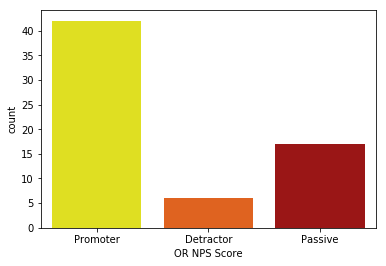

In [631]:
sns.countplot(x='OR NPS Score', palette='hot_r', data=all_data[all_data['OR NPS Score'] != 'None'])


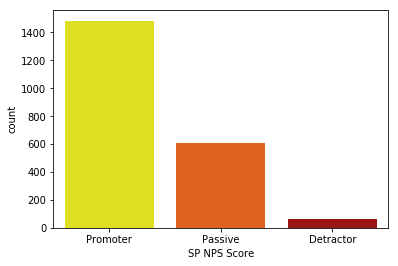

In [632]:
sns.countplot(x='SP NPS Score', palette='hot_r', data=all_data[all_data['SP NPS Score'] != 'None'])

## BUT! They can also be displayed with values that account for the 8/10 to 9/10 comparison

In [633]:
SP_NPS_Data = list(all_data[["SP NPS Score", "Promo SP NPS Score"]]["SP NPS Score"].value_counts())
Promo_SP_NPS_Data = list(all_data[["SP NPS Score", "Promo SP NPS Score"]]["Promo SP NPS Score"].value_counts())
viz_names = ["SP NPS Data", "Promo SP NPS Data"]

data_to_viz = pd.DataFrame(data=[SP_NPS_Data, Promo_SP_NPS_Data]).T
data_to_viz.columns=viz_names

# Four buckets for [NPS Categories and Nones] with Each bucket containing two bars for OR-NPS and Promo-OR-NPS

KeyError: "['Promo SP NPS Score'] not in index"

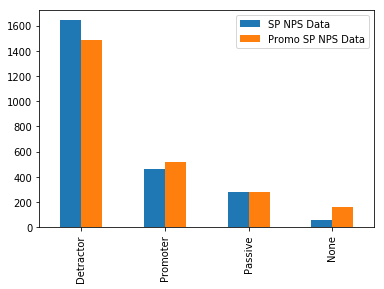

In [403]:
data_to_viz.plot(kind="bar")
plt.xticks([0, 1, 2, 3], ["Detractor", "Promoter", "Passive", "None"])
plt.show()

In [634]:
# df.groupby(['Sex'])['Pclass'].value_counts().unstack().plot(kind='bar', stacked=True)
# sns.countplot(x="Sex", hue="Pclass", data=df)
# df[['Open','High','Low','Close','Adj Close']].plot(kind='bar')

# plt.show()
# all_data[all_data["OR NPS Score", "Promo OR NPS Score"]].plot(kind='bar')
# plt.show()

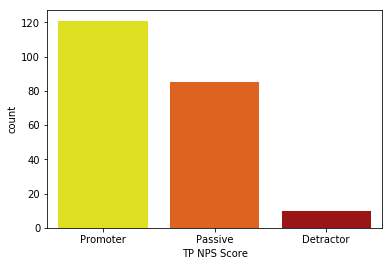

In [635]:
sns.countplot(x='TP NPS Score', palette='hot_r', data=all_data[all_data['TP NPS Score'] != 'None'])

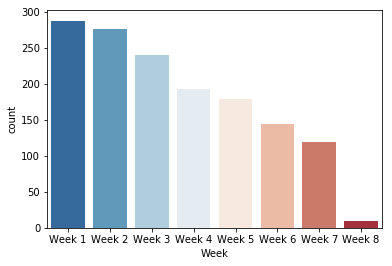

In [636]:
# How many datapoints were collected week by week? 
# Follow-up Question: How might that affect the final analysis? 

sns.countplot(x='Week', palette='RdBu_r', order=["Week 1", "Week 2", "Week 3", "Week 4", "Week 5", "Week 6", "Week 7", "Week 8"], data=all_data[all_data["Week"] != "NoWeek"])

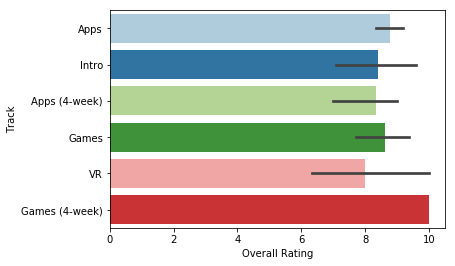

In [656]:
# How did the program that students were enrolled in affect their rating? 

sns.barplot(x="Overall Rating", y='Track', palette='Paired', data=all_data[(all_data["Overall Rating"] != 0) & (all_data['Track'] != 'Track')])


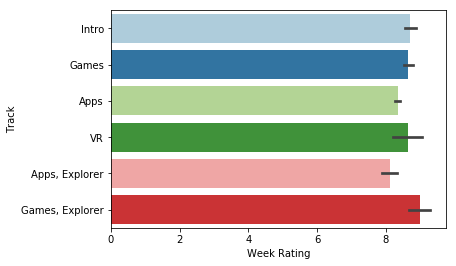

In [657]:
sns.barplot(x="Week Rating", y='Track', palette='Paired', data=all_data[(all_data["Week Rating"] != 0) & (all_data['Track'] != 'Track')])


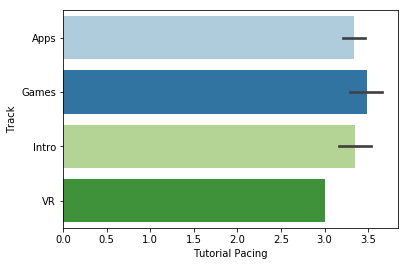

In [659]:
sns.barplot(x="Tutorial Pacing", y='Track', palette='Paired', data=all_data[(all_data["Tutorial Pacing"] != 0) & (all_data['Track'] != 'Track')])

# Faster: Games 
# Slower: VR

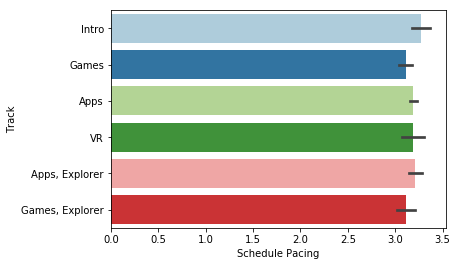

In [660]:
sns.barplot(x="Schedule Pacing", y='Track', palette='Paired', data=all_data[(all_data["Schedule Pacing"] != 0) & (all_data['Track'] != 'Track')])

# Faster: Intro
# Slower: Games

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


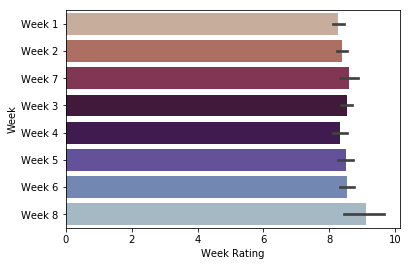

In [638]:
# Do students have a better time at Summer Academy in their later weeks? 
# Follow-up Question: Does their experience improve as they get the hang of the material? As the staff get more comfortable? 
sns.barplot(x='Week Rating', y="Week", palette='twilight_r', data=all_data[(all_data["Week Rating"] != 0) & (all_data["Week"]!= "NoWeek")])



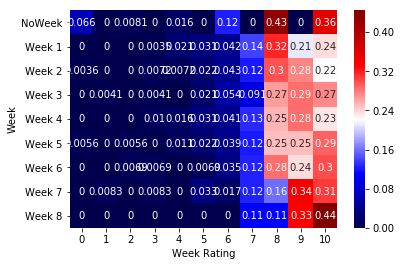

In [639]:
# Another way to see the same information that compares week to week rating 
sns.heatmap(pd.crosstab(all_data['Week'], all_data['Week Rating'], normalize='index'), cmap='seismic', annot=True)



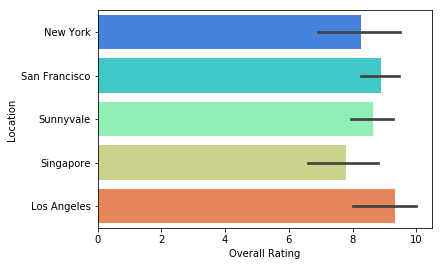

In [640]:
# Does student satisfaction vary by location?
# Are some Summer Academy locations better than others at providing a successful experience for their students? 
sns.barplot(x='Overall Rating', y="Location", palette='rainbow', data=all_data[(all_data["Overall Rating"] != 0) & (all_data["Location"] != "Location")])

# Higher: Los Angeles, San Francisco
# Lower: New York, Singapore

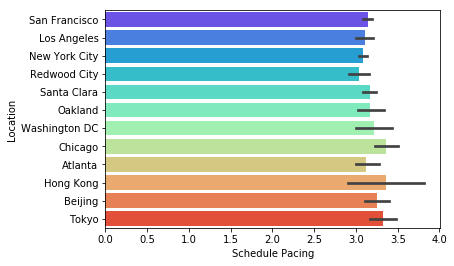

In [641]:
# Does the Tutorial Pacing vary by location? 
sns.barplot(x='Schedule Pacing', y="Location", palette='rainbow', data=all_data[(all_data["Schedule Pacing"] != 0) & (all_data["Location"] != "Location")])

#Faster: Hong King, Chicago
# Slower: Atlanta, Redwood City 

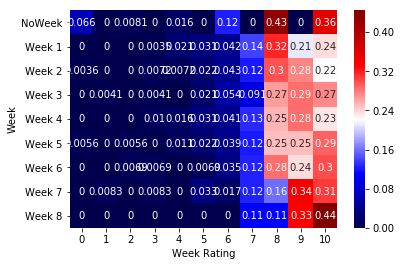

In [642]:
# df.plot.scatter(x="Age", y="Fare")
sns.heatmap(pd.crosstab(all_data['Week'], all_data['Week Rating'], normalize='index'), cmap='seismic', annot=True)